In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
np.random.seed(3)
X = np.random.rand(1000, 1)
y = 4 + 3 * X + 0.2 * np.random.rand(1000, 1)

In [54]:
ones = np.ones((X.shape[0], 1))
Xbar = np.concatenate((ones, X), axis=1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)


In [55]:
w = np.dot(np.linalg.pinv(A), b)
print(w)

[[4.09229356]
 [3.01623505]]


In [57]:
x0 = np.linspace(0, 1, 2)
y0 = w[0][0] + w[1][0]*x0

(0.0, 1.0, 0.0, 10.0)

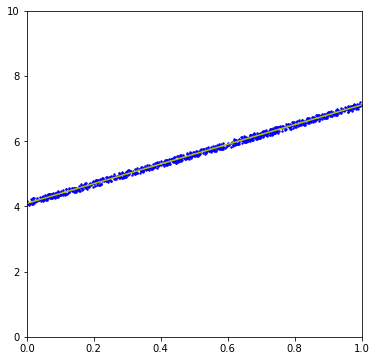

In [61]:
plt.figure(figsize=(6, 6))
plt.scatter(X, y, s=2, c='b')
plt.plot(x0, y0, 'y')
plt.axis([0, 1, 0, 10])

In [72]:
### Find w with gradient descent
def loss_deri(w):
    N = Xbar.shape[0]
    return (1/N) * Xbar.T.dot(np.dot(Xbar, w) - y)

In [64]:
def loss(w):
    N = Xbar.shape[0]
    return (1/2*N) * np.linalg.norm(y - Xbar.dot(w), 2) ** 2

In [80]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        print(np.linalg.norm(grad(w_new)))
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return w

In [81]:
w_init = np.array([[2], [1]])
w = myGD(w_init, loss_deri, 1)
print('Solution found by GD: w = {}, after {} iterations'.format(w[-1], len(w)))

0.9702852458332121
0.26738406943075865
0.08255759412707261
0.042855764024001104
0.03611387675044444
0.033487048934460424
0.03133776647318281
0.029349460250457534
0.027489131833175084
0.025746865517311143
0.02411503578841761
0.022586631912633506
0.021155097896473248
0.019814294086353084
0.018558470023218678
0.01738223971555068
0.016280558534777223
0.015248701579416307
0.014282243410838603
0.01337703907339828
0.012529206317505143
0.011735108949392564
0.010991341236173036
0.01029471329929587
0.009642237433763792
0.0090311152944332
0.008458725894442975
0.007922614364299372
0.007420481423406618
0.00695017351888896
0.006509673589411025
0.006097092414384722
0.00571066051146065
0.0053487205475541205
0.005009720230858247
0.004692205653358904
0.004394815055299271
0.00411627298485075
0.0038553848279420664
0.0036110316847862613
0.0033821655711319906
0.0031678049236579004
0.0029670303902338533
0.0027789808869941187
0.002602849905312221
0.0024378820528383853
0.002283369813765185
0.002138650514426554